### Project Description

The aim of this assignmebt is predection of price of Groningen houses via a txt file involves the report of size and price of this area's house.

#### loading data

To start, the data is loaded from the file "housing-data.txt" and create a scatter plot to visualize the relationship between the size and price of houses. 
It is notable that as data in comma sepration status, when I wanted to load them in dataframe, I changed the type of price and size to float.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yaml

# Load the data from the file
configPath = 'config.yaml'

# Read the yaml data from the file
with open(configPath, 'r') as file:
    configData = yaml.safe_load(file)

data = []
with open(configData["housing_data_path"], 'r') as file:
    next(file)  # Skip the first line (header)
    for line in file:
        size, price = line.strip().split(',')
        data.append((float(size), float(price)))

#### visualize the relationship between the size and price

the amount of data: 200


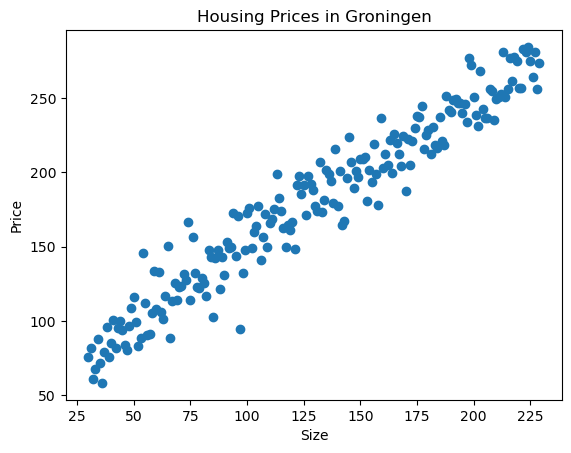

In [2]:
# Separate the data into sizes and prices
sizes = [d[0] for d in data]
prices = [d[1] for d in data]

print(f'the amount of data: {len(data)}')

# Create a scatter plot
plt.scatter(sizes, prices)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Housing Prices in Groningen')
plt.show()

The 200 observation of data is plotted and it shows there is a strong releation between price and the size of house. because meanwhile the size is grown the price is get higher.

#### compute_cost function

In this step the function which can calculate the total cost of the data is written.
For calling the function, first a column of 1 is added to the size matrix to account for the bias term in the hypothesis function.

In [3]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    
    # Computing the hypothesis function
    h = np.dot(X, theta)
    
    # Computing the cost
    cost = (1 / (2 * m)) * np.sum(np.square(h - y))
    
    return cost

In [4]:
#calling compute_cost based on housing data
import numpy as np

#use size as a factor and price as a depended value
X = np.array(sizes).reshape(-1, 1)    
y = np.array(prices).reshape(-1, 1)  
theta = np.array([[0], [0]]) 

m = len(y)
X = np.concatenate((np.ones((m, 1)), X), axis=1)

cost = compute_cost(X, y, theta)

print(f"Total cost: {cost}")

Total cost: 17840.78096122935


The price is assumed as dependent variable (y) and the size is independ (X), based on these assumption the total cost equals by 17840.79

#### gradient_descent function

This function performs gradient descent for a specified number of iterations and returns the optimized theta and the list of costs:

In [5]:
import numpy as np

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)  # Number of training examples
    costs = []  # List to store costs at each iteration 
    
    for _ in range(num_iters):
        # Compute the hypothesis function
        h = np.dot(X, theta)
        
        # Update theta using gradient descent
        theta = theta - (alpha/m) * np.dot(X.T, (h - y))
        
        # Compute the cost and add it to the list
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    
    return theta, costs

In [6]:
#calling gradient_descent function

alpha = 0.01
num_iters = 100
optimized_theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)
print(f'optimized_theta:\n {optimized_theta},\n cost_history:\n {np.array(cost_history)}')

optimized_theta:
 [[-1.10105280e+228]
 [-1.70925346e+230]],
 cost_history:
 [7.00355874e+008 2.80263647e+013 1.12154053e+018 4.48810671e+022
 1.79602086e+027 7.18719752e+031 2.87612517e+036 1.15094875e+041
 4.60579060e+045 1.84311482e+050 7.37565502e+054 2.95154085e+059
 1.18112810e+064 4.72656031e+068 1.89144365e+073 7.56905411e+077
 3.02893402e+082 1.21209878e+087 4.85049676e+091 1.94103972e+096
 7.76752437e+100 3.10835654e+105 1.24388156e+110 4.97768298e+114
 1.99193626e+119 7.97119878e+123 3.18986161e+128 1.27649773e+133
 5.10820418e+137 2.04416737e+142 8.18021379e+146 3.27350386e+151
 1.30996913e+156 5.24214782e+160 2.09776805e+165 8.39470944e+169
 3.35933931e+174 1.34431819e+179 5.37960363e+183 2.15277420e+188
 8.61482945e+192 3.44742548e+197 1.37956793e+202 5.52066371e+206
 2.20922269e+211 8.84072127e+215 3.53782138e+220 1.41574196e+225
 5.66542256e+229 2.26715133e+234 9.07253628e+238 3.63058757e+243
 1.45286452e+248 5.81397717e+252 2.32659894e+257 9.31042976e+261
 3.72578621e+2

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21128\2814137641.py:10: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum(np.square(h - y))
c:\Users\Lenovo\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


#### plot of the values of J(\theta) 

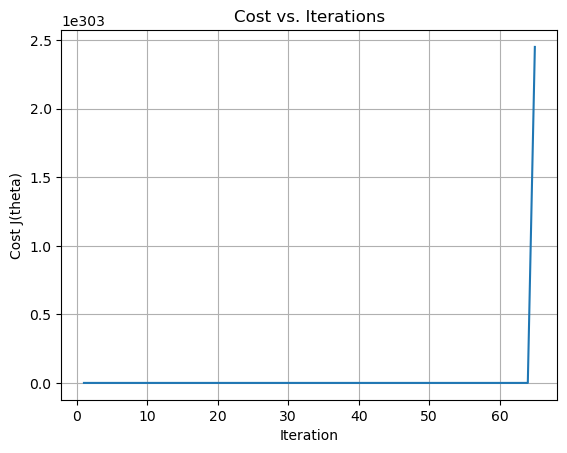

In [7]:
import matplotlib.pyplot as plt

# Create a list of iteration numbers for x-axis
iterations = range(1, len(cost_history) + 1)

# Plot the cost values
plt.plot(iterations, cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost J(theta)')
plt.title('Cost vs. Iterations')
plt.grid(True)
plt.show()


the cost values increase as the iterations progress. This means the optimization algorithm is not converging properly. Therefore, we may need to revisit learning rate, number of iterations, or check for errors in the implementation.
For the equal values in iteration progress, it might imply that the algorithm has reached a local minimum and cannot make further progress, or there might be instability in the convergence. So, as well, we can try adjusting the learning rate, increasing the number of iterations, or exploring different optimization techniques.